<a href="https://colab.research.google.com/github/saparbayev-azizbek-12/bi-and-ai-talents-dl/blob/main/lesson-5/lesson_5_pytorch_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
housing  = pd.read_csv("housing.csv")
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
X = housing[['area', 'bathrooms', 'bedrooms', 'stories']].to_numpy()
Y = housing['price'].to_numpy()

In [27]:
import torch

X = torch.Tensor(X)
Y = torch.Tensor(Y)

X.size(), Y.size()

(torch.Size([545, 4]), torch.Size([545]))

In [28]:
Wh1 = torch.randn(4, 16)
bh1 = torch.randn(16)
Wh2 = torch.randn(16, 8)
bh2 = torch.randn(8)
Wh3 = torch.randn(8, 4)
bh3 = torch.randn(4)
Wo = torch.randn(4, 1)
bo = torch.randn(1)

params = [Wh1, bh1, Wh2, bh2, Wh3, bh3, Wo, bo]

for param in params:
  param.requires_grad = True

In [22]:
def model(x):
  h1 = torch.tanh(x @ Wh1 + bh1)
  h2 = torch.tanh(h1 @ Wh2 + bh2)
  h3 = torch.tanh(h2 @ Wh3 + bh3)
  ho = h3 @ Wo + bo
  return ho

In [23]:
def calc_loss(y_true, y_pred):
  return torch.mean((y_true - y_pred) ** 2)

In [29]:
batch_size = 50
lr = 0.000001
epoch = 10
n_size = X.shape[0]
lossi = []

for _ in range(epoch):
  for ix in range(0, n_size, batch_size):
    x_batch = X[ix:ix+batch_size]
    y_true = Y[ix:ix+batch_size]
    y_pred = model(x_batch)
    loss = calc_loss(y_true, y_pred.squeeze())
    loss.backward()
    lossi.append(loss)
    for param in params:
      param.data -= param.grad * lr

In [31]:
lossi

[tensor(3.9047, grad_fn=<MeanBackward0>),
 tensor(2.3333, grad_fn=<MeanBackward0>),
 tensor(3.9040, grad_fn=<MeanBackward0>),
 tensor(2.4885, grad_fn=<MeanBackward0>),
 tensor(6.1387, grad_fn=<MeanBackward0>),
 tensor(5.5071, grad_fn=<MeanBackward0>),
 tensor(6.3885, grad_fn=<MeanBackward0>),
 tensor(6.1725, grad_fn=<MeanBackward0>),
 tensor(6.1490, grad_fn=<MeanBackward0>),
 tensor(8.3486, grad_fn=<MeanBackward0>),
 tensor(6.2321, grad_fn=<MeanBackward0>),
 tensor(3.9039, grad_fn=<MeanBackward0>),
 tensor(2.3309, grad_fn=<MeanBackward0>),
 tensor(3.8991, grad_fn=<MeanBackward0>),
 tensor(2.4833, grad_fn=<MeanBackward0>),
 tensor(6.1279, grad_fn=<MeanBackward0>),
 tensor(5.4938, grad_fn=<MeanBackward0>),
 tensor(6.3742, grad_fn=<MeanBackward0>),
 tensor(6.1562, grad_fn=<MeanBackward0>),
 tensor(6.1326, grad_fn=<MeanBackward0>),
 tensor(8.3234, grad_fn=<MeanBackward0>),
 tensor(6.2104, grad_fn=<MeanBackward0>),
 tensor(3.9032, grad_fn=<MeanBackward0>),
 tensor(2.3249, grad_fn=<MeanBackw

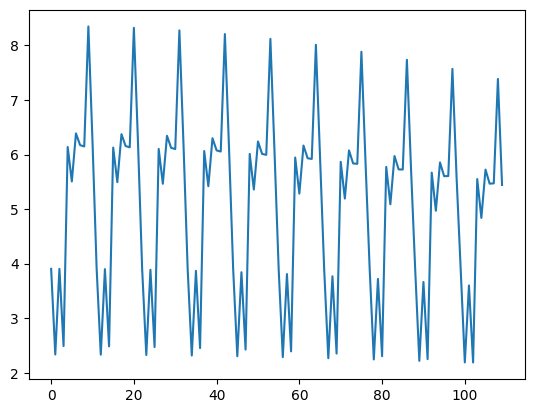

In [30]:
import matplotlib.pyplot as plt

plt.plot(torch.stack(lossi).detach().numpy())
plt.show()